In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv('/Users/hugodrak/Documents/chalmers/1_kandarb_EENX16/CASE/cpp_playground/logs/rosbag2_2024_02_20-13_11_18.csv')
df = df.sample(n=1000)
df.reset_index(drop=True, inplace=True)
df

,time,x,y,intens
0,0,-1.465749,7.872524,1.000000
1,10,0.921650,-10.702577,1.000000
2,11,-1.637227,-4.806958,0.733333
3,3,1.103345,-7.438144,1.000000
4,1,-11.123960,-0.443898,0.066667
...,...,...,...,...
995,2,-5.264481,-0.307222,0.533333
996,0,-8.691365,0.026666,1.000000
997,5,-5.431061,2.447406,0.600000
998,1,-2.031012,10.548440,1.000000


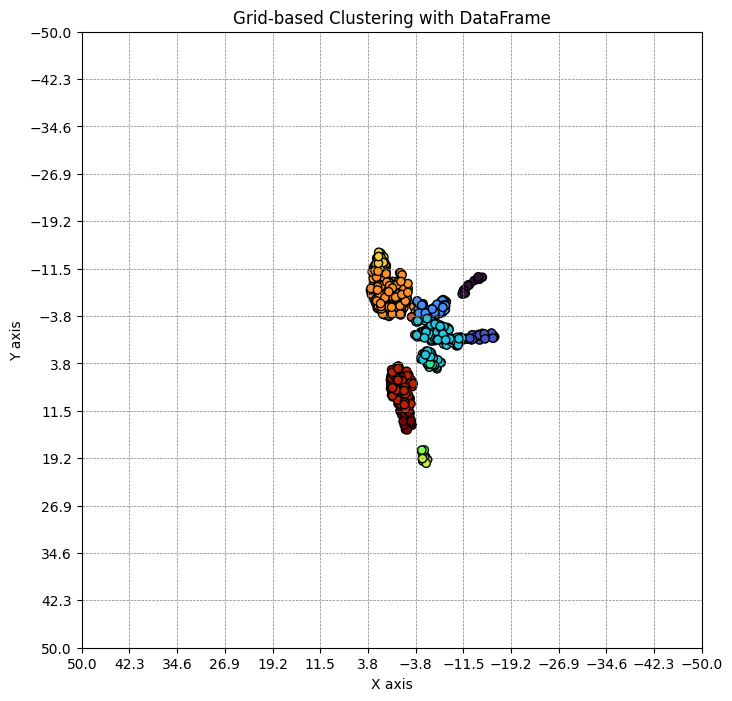

In [26]:
import numpy as np
import matplotlib.pyplot as plt



r = 50
# Generate synthetic data
np.random.seed(0)

# Perform grid-based clustering

n = 13  # Number of divisions along x and y axes

if n%2 != 1:
	raise ValueError('n must be an odd number')

n_x, n_y = n, n  # Number of divisions along x and y axes

# Determine the size of each grid cell
x_min, x_max = -r, r
y_min, y_max = -r, r
x_size = (x_max - x_min) / n_x
y_size = (y_max - y_min) / n_y

# Assign points to grid cells
df['x_idx'] = ((df['x'] - x_min) / x_size).astype(int)
df['y_idx'] = ((df['y'] - y_min) / y_size).astype(int)

# Group by grid cells
clusters = df.groupby(['x_idx', 'y_idx']).apply(lambda x: x.index.tolist()).tolist()

plt.figure(figsize=(8, 8))
# Assign cluster ID to each point
df['cluster_id'] = -1
for cluster_idx, cluster in enumerate(clusters):
	df.loc[cluster, 'cluster_id'] = cluster_idx

plt.scatter(df['x'], df['y'], c=df['cluster_id'], cmap='turbo', edgecolors='k')


# Draw grid^
x_ticks = np.linspace(x_min, x_max, n_x + 1)
y_ticks = np.linspace(y_min, y_max, n_y + 1)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.xticks(x_ticks)
plt.yticks(y_ticks)

plt.xlim(r, -r)
plt.ylim(r, -r)

plt.title('Grid-based Clustering with DataFrame')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()



[[(4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5)], [(4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6), (4, 6)], [(5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5

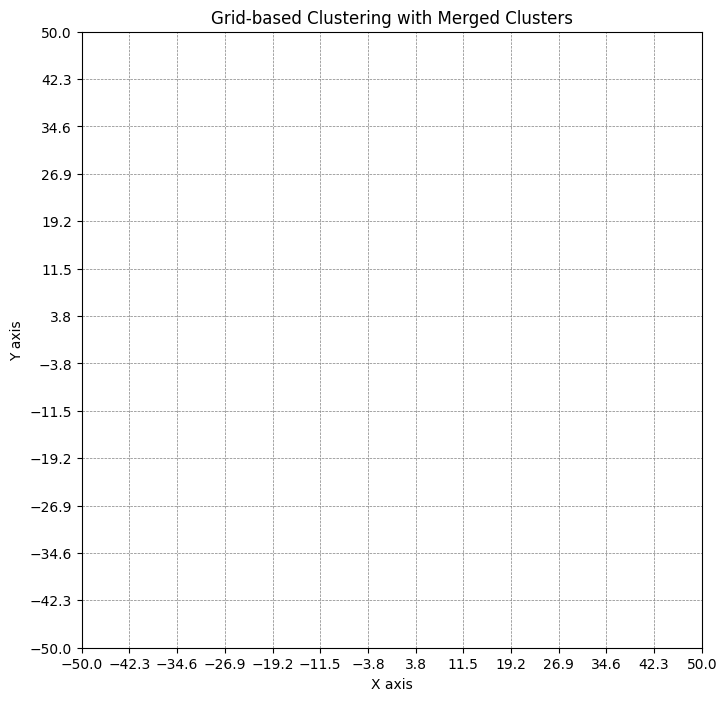

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Function to check if two clusters are adjacent
def are_adjacent(cluster_a, cluster_b):
    for cell_a in cluster_a:
        for cell_b in cluster_b:
            if abs(cell_a[0] - cell_b[0]) <= 1 and abs(cell_a[1] - cell_b[1]) <= 1:
                return True
    return False

# Function to merge adjacent clusters
def merge_adjacent_clusters(clusters):
    merged = True
    while merged:
        merged = False
        new_clusters = []
        while clusters:
            current = clusters.pop()
            merged_any = False
            for i, other in enumerate(clusters):
                if are_adjacent(current, other):
                    # Merge two clusters
                    current = current + other
                    clusters.pop(i)
                    merged = True
                    merged_any = True
                    break
            if not merged_any:
                new_clusters.append(current)
        clusters = new_clusters
    return clusters

r = 50
# Generate synthetic data
np.random.seed(0)

n = 13  # Number of divisions along x and y axes

if n % 2 != 1:
    raise ValueError('n must be an odd number')

n_x, n_y = n, n  # Number of divisions along x and y axes

# Determine the size of each grid cell
x_min, x_max = -r, r
y_min, y_max = -r, r
x_size = (x_max - x_min) / n_x
y_size = (y_max - y_min) / n_y

# Assign points to grid cells
df['x_idx'] = ((df['x'] - x_min) / x_size).astype(int)
df['y_idx'] = ((df['y'] - y_min) / y_size).astype(int)

# Group by grid cells and create list of clusters
raw_clusters = df.groupby(['x_idx', 'y_idx']).apply(lambda x: [(x_idx, y_idx) for x_idx, y_idx in zip(x['x_idx'], x['y_idx'])]).tolist()

# Merge adjacent clusters
clusters = merge_adjacent_clusters(raw_clusters)

plt.figure(figsize=(8, 8))

# Assign cluster ID to each point
df['cluster_id'] = -1
for cluster_idx, cluster_cells in enumerate(clusters):
    for x_idx, y_idx in cluster_cells:
        df.loc[(df['x_idx'] == x_idx) & (df['y_idx'] == y_idx), 'cluster_id'] = cluster_idx

colors = cm.turbo(np.linspace(0, 1, len(clusters)))
for idx, color in enumerate(colors):
    cluster_points = df[df['cluster_id'] == idx]
    plt.scatter(cluster_points['x'], cluster_points['y'], color=color, edgecolors='k')

# Draw grid
x_ticks = np.linspace(x_min, x_max, n_x + 1)
y_ticks = np.linspace(y_min, y_max, n_y + 1)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.xticks(x_ticks)
plt.yticks(y_ticks)

plt.xlim(-r, r)
plt.ylim(-r, r)

plt.title('Grid-based Clustering with Merged Clusters')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()


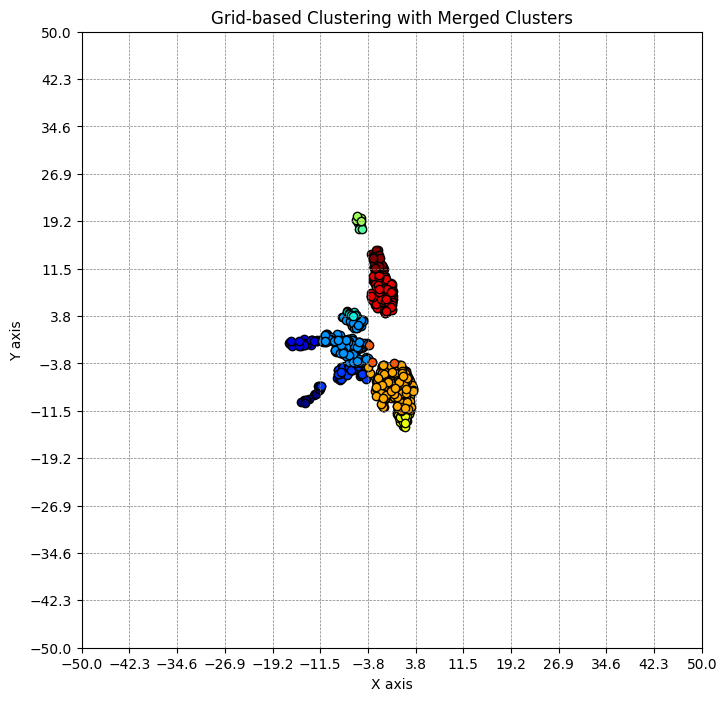

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame with synthetic 'x' and 'y' data
r = 50  # Range for x and y
np.random.seed(0)  # For reproducibility



n = 13  # Grid size (number of divisions along x and y axes)
if n % 2 != 1:
	raise ValueError('n must be an odd number')

# Grid dimensions based on the range and number of divisions
x_min, x_max, y_min, y_max = -r, r, -r, r
x_size = (x_max - x_min) / n
y_size = (y_max - y_min) / n

# Assign points to grid cells
df['x_idx'] = ((df['x'] - x_min) / x_size).astype(int)
df['y_idx'] = ((df['y'] - y_min) / y_size).astype(int)

# Initial grouping by grid cells
initial_clusters = df.groupby(['x_idx', 'y_idx']).apply(lambda group: group.index.tolist()).tolist()

# Function to find unique clusters after merging
def find_unique_clusters(clusters):
	unique_clusters = []
	for cluster in clusters:
		# Convert each cluster to a set of tuples (x_idx, y_idx) for comparison
		set_cluster = set(tuple(idx for idx in cluster))
		if set_cluster not in unique_clusters:
			unique_clusters.append(set_cluster)
	return [list(cluster) for cluster in unique_clusters]

# Function to merge adjacent clusters
def merge_adjacent_clusters(initial_clusters, df):
	merged_clusters = []
	for cluster in initial_clusters:
		new_cluster = set(cluster)
		for other_cluster in initial_clusters:
			if new_cluster.isdisjoint(other_cluster):  # Only consider non-overlapping clusters
				continue
			# Check if clusters are adjacent by comparing grid indices
			for idx in other_cluster:
				for other_idx in new_cluster:
					if (abs(df.loc[idx, 'x_idx'] - df.loc[other_idx, 'x_idx']) <= 1 and
							abs(df.loc[idx, 'y_idx'] - df.loc[other_idx, 'y_idx']) <= 1):
						new_cluster.update(other_cluster)
						break
		merged_clusters.append(new_cluster)
		
	return find_unique_clusters(merged_clusters)  # Remove duplicate clusters

# Merge adjacent clusters
merged_clusters = merge_adjacent_clusters(initial_clusters, df)

# Assign new cluster IDs to the DataFrame
cluster_id_map = {idx: cluster_id for cluster_id, cluster in enumerate(merged_clusters) for idx in cluster}
df['cluster_id'] = df.index.map(cluster_id_map).fillna(-1)

# Plotting
plt.figure(figsize=(8, 8))
colors = plt.cm.jet(np.linspace(0, 1, len(merged_clusters)))

for cluster_id, color in zip(range(len(merged_clusters)), colors):
	cluster_points = df[df['cluster_id'] == cluster_id]
	plt.scatter(cluster_points['x'], cluster_points['y'], color=color, edgecolors='k')

# Draw the grid
x_ticks = np.linspace(x_min, x_max, n + 1)
y_ticks = np.linspace(y_min, y_max, n + 1)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.xlim(-r, r)
plt.ylim(-r, r)
plt.title('Grid-based Clustering with Merged Clusters')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame with synthetic 'x' and 'y' data
r = 50  # Range for x and y
np.random.seed(0)  # For reproducibility

n = 13  # Grid size (number of divisions along x and y axes)
if n % 2 != 1:
	raise ValueError('n must be an odd number')

# Grid dimensions based on the range and number of divisions
x_min, x_max, y_min, y_max = -r, r, -r, r
x_size = (x_max - x_min) / n
y_size = (y_max - y_min) / n

# Assign points to grid cells
df['x_idx'] = ((df['x'] - x_min) / x_size).astype(int)
df['y_idx'] = ((df['y'] - y_min) / y_size).astype(int)

# Initial grouping by grid cells
initial_clusters = df.groupby(['x_idx', 'y_idx']).apply(lambda group: group.index.tolist()).tolist()







[[28,
  46,
  67,
  76,
  88,
  102,
  253,
  429,
  460,
  528,
  577,
  587,
  608,
  642,
  745,
  836,
  895,
  961],
 [117,
  165,
  173,
  207,
  215,
  244,
  305,
  314,
  319,
  393,
  397,
  410,
  415,
  453,
  494,
  510,
  513,
  626,
  639,
  673,
  709,
  785,
  828,
  879,
  910,
  912,
  956,
  967],
 [10,
  31,
  35,
  58,
  66,
  70,
  77,
  85,
  95,
  101,
  105,
  142,
  143,
  144,
  152,
  159,
  168,
  169,
  175,
  197,
  218,
  223,
  230,
  236,
  243,
  246,
  271,
  279,
  284,
  287,
  295,
  297,
  298,
  303,
  332,
  342,
  343,
  348,
  353,
  355,
  390,
  398,
  421,
  442,
  465,
  477,
  490,
  536,
  552,
  556,
  559,
  560,
  575,
  598,
  611,
  621,
  628,
  630,
  638,
  706,
  733,
  736,
  746,
  748,
  767,
  769,
  770,
  773,
  781,
  789,
  816,
  823,
  847,
  852,
  866,
  869,
  873,
  874,
  877,
  900,
  914,
  922,
  952,
  955,
  965,
  986],
 [4,
  12,
  13,
  19,
  23,
  26,
  37,
  39,
  41,
  54,
  55,
  57,
  59,
  84,
  90

In [71]:
xs = list(np.random.uniform(0, 2, 30)) + list(np.random.uniform(2, 4, 30)) + list(np.random.uniform(10, 12, 30))
ys = list(np.random.uniform(0, 2, 30)) + list(np.random.uniform(2, 4, 30)) + list(np.random.uniform(10, 12, 30))
df = pd.DataFrame({'x': xs, 'y': ys})
df

,x,y
0,1.097627,0.637138
1,1.430379,1.334821
2,1.205527,0.263596
3,1.089766,1.432654
4,0.847310,0.578812
...,...,...
85,10.530779,10.447849
86,11.046496,10.690703
87,10.187881,11.856163
88,11.151893,11.408829


In [10]:
df = pd.read_csv('/Users/hugodrak/Documents/chalmers/1_kandarb_EENX16/CASE/cpp_playground/logs/rosbag2_2024_02_20-13_11_18.csv')
df = df.sample(n=1000)
df.reset_index(drop=True, inplace=True)
df

,time,x,y,intens
0,0,-1.465749,7.872524,1.000000
1,10,0.921650,-10.702577,1.000000
2,11,-1.637227,-4.806958,0.733333
3,3,1.103345,-7.438144,1.000000
4,1,-11.123960,-0.443898,0.066667
...,...,...,...,...
995,2,-5.264481,-0.307222,0.533333
996,0,-8.691365,0.026666,1.000000
997,5,-5.431061,2.447406,0.600000
998,1,-2.031012,10.548440,1.000000


D: 2.4691358024691357 m


/var/folders/g8/4rhybrsx49v63_kdkt3rz91r0000gn/T/ipykernel_1291/621899407.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clusters_df = pd.concat([clusters_df, pd.DataFrame({'cluster_id': [cluster_id], 'center_x': [center_x], 'center_y': [center_y]})], ignore_index=True)


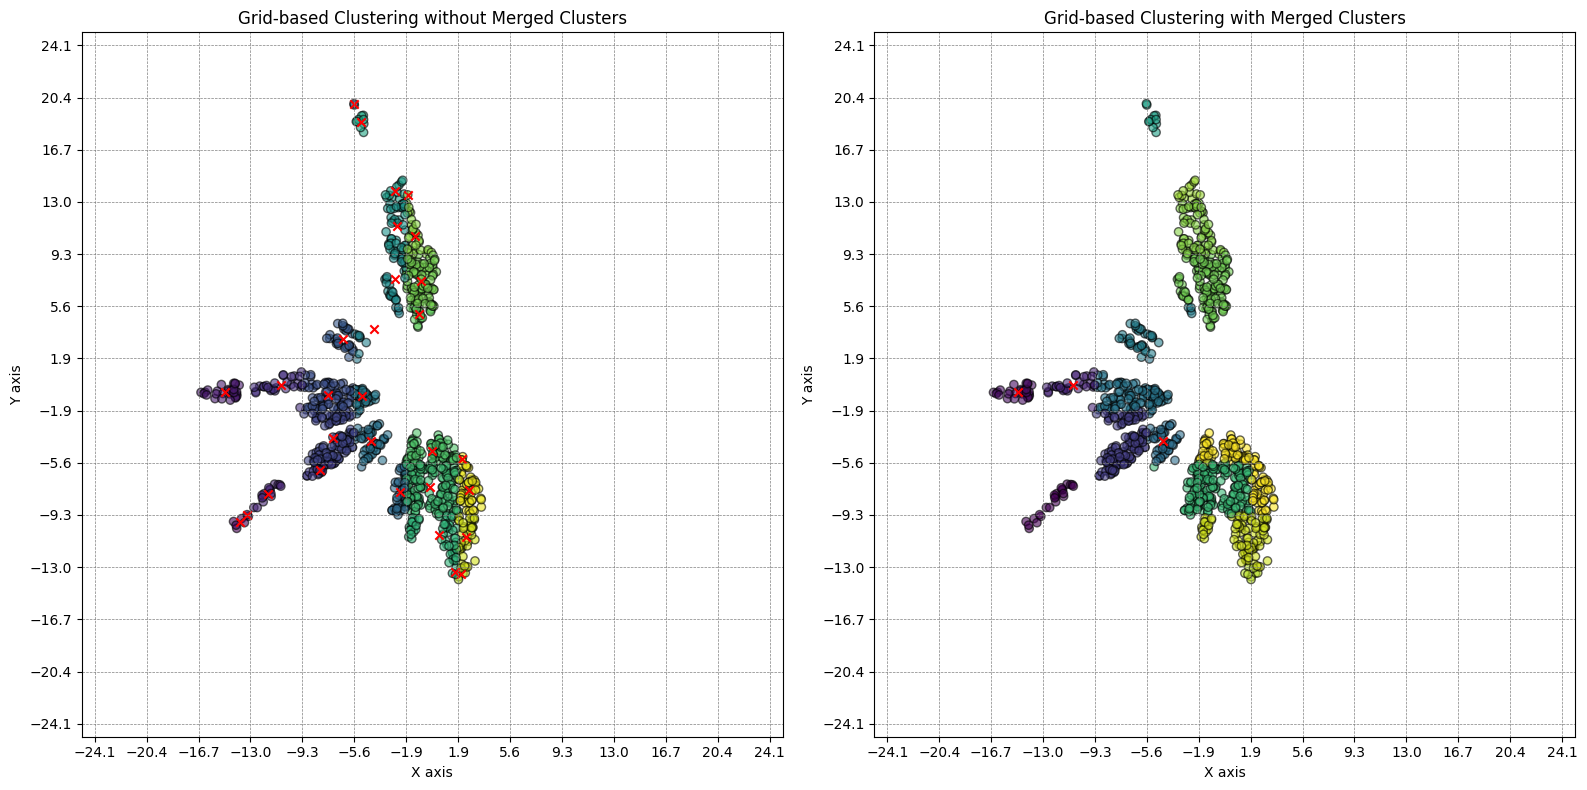

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
r = 50  # Range for x and y
#D = 10  # Distance threshold for merging clusters
n = 27  # Grid size (number of divisions along x and y axes)

# TODO: do n*n for clsuters! so that updated clusters have updated com and redo clustering so not one shot

# Check n is odd
if n % 2 != 1:
    raise ValueError('n must be an odd number')

# Generate synthetic data
np.random.seed(0)

# Determine grid cell size
x_min, x_max, y_min, y_max = -r, r, -r, r
x_size = (x_max - x_min) / n
y_size = (y_max - y_min) / n

D = x_size / (1.5) # must be div by max 2, rn, 75% of box size
print("D:", D, "m")

# Assign points to grid cells
df['x_idx'] = ((df['x'] - x_min) / x_size).astype(int)
df['y_idx'] = ((df['y'] - y_min) / y_size).astype(int)

# Create initial clusters based on grid cells
initial_clusters = df.groupby(['x_idx', 'y_idx']).apply(lambda group: group.index.tolist()).tolist()

# Initialize a new DataFrame for clusters
clusters_df = pd.DataFrame(columns=['cluster_id', 'center_x', 'center_y'])

# Assign cluster IDs and calculate centers of mass
for cluster_id, cluster_indices in enumerate(initial_clusters):
    cluster_points = df.loc[cluster_indices]
    center_x = cluster_points['x'].mean()
    center_y = cluster_points['y'].mean()
    clusters_df = pd.concat([clusters_df, pd.DataFrame({'cluster_id': [cluster_id], 'center_x': [center_x], 'center_y': [center_y]})], ignore_index=True)
    #clusters_df = clusters_df.append({'cluster_id': cluster_id, 'center_x': center_x, 'center_y': center_y}, ignore_index=True)
    df.loc[cluster_indices, 'cluster_id'] = cluster_id


fig, axs = plt.subplots(1, 2, figsize=(16, 8))
x_ticks = np.linspace(x_min, x_max, n + 1)
y_ticks = np.linspace(y_min, y_max, n + 1)

axs[0].set_xticks(x_ticks)
axs[0].set_yticks(y_ticks)
axs[0].grid(True, linestyle='--', linewidth=0.5, color='gray')
# Plot 1: Grid-based Clustering without Merged Clusters
axs[0].scatter(df['x'], df['y'], c=df['cluster_id'], cmap='viridis', alpha=0.6, edgecolors='k')
for _, row in clusters_df.iterrows():
    axs[0].scatter(row['center_x'], row['center_y'], c='red', marker='x')  # Marking the centers
axs[0].set_title('Grid-based Clustering without Merged Clusters')
axs[0].set_xlabel('X axis')
axs[0].set_ylabel('Y axis')
axs[0].set_xlim(-r/2, r/2)
axs[0].set_ylim(-r/2, r/2)




# Function to merge clusters based on their centers of mass
def merge_clusters(df, clusters_df, D):
    merged_clusters = {}
    for _, row in clusters_df.iterrows():
        min_dist = float('inf')
        closest_cluster = None
        for _, other_row in clusters_df.iterrows():
            if row['cluster_id'] != other_row['cluster_id']:
                distance = np.sqrt((row['center_x'] - other_row['center_x'])**2 + (row['center_y'] - other_row['center_y'])**2)
                if distance < min_dist:
                    min_dist = distance
                    closest_cluster = other_row['cluster_id']
        if min_dist < D:
            if closest_cluster in merged_clusters:
                merged_clusters[row['cluster_id']] = merged_clusters[closest_cluster]
            else:
                merged_clusters[row['cluster_id']] = closest_cluster

    # Update cluster IDs in the original dataframe
    for old_id, new_id in merged_clusters.items():
        df.loc[df['cluster_id'] == old_id, 'cluster_id'] = new_id
    
    # Update cluster centers in the cluster dataframe
    for new_id in set(merged_clusters.values()):
        cluster_points = df[df['cluster_id'] == new_id]
        clusters_df.loc[clusters_df['cluster_id'] == new_id, ['center_x', 'center_y']] = cluster_points['x'].mean(), cluster_points['y'].mean()

    # Remove merged clusters from cluster dataframe
    clusters_df = clusters_df[~clusters_df['cluster_id'].isin(merged_clusters.keys())].reset_index(drop=True)

    return df, clusters_df

# Merge clusters based on centers of mass closer than D apart
df, clusters_df = merge_clusters(df, clusters_df, D)

# Plot 2: Grid-based Clustering with Merged Clusters
axs[1].scatter(df['x'], df['y'], c=df['cluster_id'], cmap='viridis', alpha=0.6, edgecolors='k')
for _, row in clusters_df.iterrows():
    axs[1].scatter(row['center_x'], row['center_y'], c='red', marker='x')  # Marking the centers
axs[1].set_title('Grid-based Clustering with Merged Clusters')
axs[1].set_xlabel('X axis')
axs[1].set_ylabel('Y axis')
axs[1].set_xticks(x_ticks)
axs[1].set_yticks(y_ticks)
axs[1].grid(True, linestyle='--', linewidth=0.5, color='gray')
axs[1].set_xlim(-r/2, r/2)
axs[1].set_ylim(-r/2, r/2)

plt.tight_layout()
plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
r = 50  # Range for x and y
#D = 10  # Distance threshold for merging clusters
n = 27  # Grid size (number of divisions along x and y axes)

# TODO: do n*n for clsuters! so that updated clusters have updated com and redo clustering so not one shot

# Check n is odd
if n % 2 != 1:
	raise ValueError('n must be an odd number')

# Generate synthetic data
np.random.seed(0)

# Determine grid cell size
x_min, x_max, y_min, y_max = -r, r, -r, r
x_size = (x_max - x_min) / n
y_size = (y_max - y_min) / n

D = x_size / (1.5) # must be div by max 2, rn, 75% of box size
print("D:", D, "m")

# Assign points to grid cells
df['x_idx'] = ((df['x'] - x_min) / x_size).astype(int)
df['y_idx'] = ((df['y'] - y_min) / y_size).astype(int)

# Create initial clusters based on grid cells
initial_clusters = df.groupby(['x_idx', 'y_idx']).apply(lambda group: group.index.tolist()).tolist()

# Initialize a new DataFrame for clusters
clusters_df = pd.DataFrame(columns=['cluster_id', 'mass_center_x', 'mass_center_y'])

# Assign cluster IDs and calculate centers of mass
for cluster_id, cluster_indices in enumerate(initial_clusters):
	cluster_points = df.loc[cluster_indices]

	x_idx = cluster_points['x_idx'].iloc[0]
	y_idx = cluster_points['y_idx'].iloc[0]
	mass_center_x = cluster_points['x'].mean()
	mass_center_y = cluster_points['y'].mean()

	box_centre_x = x_min + (x_idx + 0.5) * x_size
	box_centre_y = y_min + (y_idx + 0.5) * y_size

	max_x = cluster_points['x'].max()
	min_x = cluster_points['x'].min()
	max_y = cluster_points['y'].max()
	min_y = cluster_points['y'].min()



	# add heavines bool
	right_hyeavy = (mass_center_x > box_centre_x)
	top_heavy = (mass_center_y > box_centre_y)
	
	new_clust = pd.DataFrame({'cluster_id': [cluster_id], 'matched_id': [None], 'x_idx': [x_idx], 'y_idx': [y_idx], 
						   'mass_center_x': [mass_center_x], 'mass_center_x': [mass_center_x], 'max_x': [max_x], 'min_x': [min_x], 
						   'max_y': [max_y], 'min_y': [min_y],
						   'right_heavy': [right_hyeavy], 'top_heavy': [top_heavy]})

	clusters_df = pd.concat([clusters_df, new_clust], ignore_index=True)
	#clusters_df = clusters_df.append({'cluster_id': cluster_id, 'center_x': center_x, 'center_y': center_y}, ignore_index=True)
	df.loc[cluster_indices, 'cluster_id'] = cluster_id
	 
clusters_df['x_idx'] = clusters_df['x_idx'].astype(int)
clusters_df['y_idx'] = clusters_df['y_idx'].astype(int)

df['cluster_id'] = df['cluster_id'].astype(int)
print(clusters_df)


# Function to merge clusters based on their centers of mass
def merge_clusters_old(df, clusters_df, D):
	merged_clusters = {}
	for _, row in clusters_df.iterrows():
		min_dist = float('inf')
		closest_cluster = None
		for _, other_row in clusters_df.iterrows():
			if row['cluster_id'] != other_row['cluster_id']:
				distance = np.sqrt((row['center_x'] - other_row['center_x'])**2 + (row['center_y'] - other_row['center_y'])**2)
				if distance < min_dist:
					min_dist = distance
					closest_cluster = other_row['cluster_id']
		if min_dist < D:
			if closest_cluster in merged_clusters:
				merged_clusters[row['cluster_id']] = merged_clusters[closest_cluster]
			else:
				merged_clusters[row['cluster_id']] = closest_cluster

	# Update cluster IDs in the original dataframe
	for old_id, new_id in merged_clusters.items():
		df.loc[df['cluster_id'] == old_id, 'cluster_id'] = new_id
	
	# Update cluster centers in the cluster dataframe
	for new_id in set(merged_clusters.values()):
		cluster_points = df[df['cluster_id'] == new_id]
		clusters_df.loc[clusters_df['cluster_id'] == new_id, ['center_x', 'center_y']] = cluster_points['x'].mean(), cluster_points['y'].mean()

	# Remove merged clusters from cluster dataframe
	clusters_df = clusters_df[~clusters_df['cluster_id'].isin(merged_clusters.keys())].reset_index(drop=True)

	return df, clusters_df


def merge_clusters(clusters_df, D, idx=None):
		# check all directions
		up = clusters_df[(clusters_df['x_idx'] == current_box['x_idx']) & (clusters_df['y_idx'] == current_box['y_idx'] + 1)]
		down = clusters_df[(clusters_df['x_idx'] == current_box['x_idx']) & (clusters_df['y_idx'] == current_box['y_idx'] - 1)]
		left = clusters_df[(clusters_df['x_idx'] == current_box['x_idx'] - 1) & (clusters_df['y_idx'] == current_box['y_idx'])]
		right = clusters_df[(clusters_df['x_idx'] == current_box['x_idx'] + 1) & (clusters_df['y_idx'] == current_box['y_idx'])]

		if not up.empty:
			up = up.iloc[0] # can there be multiple in same box?

			if up['matched_id'] is None: # No double matching
				if abs(current_box['max_y'] - up['min_y']) < D: # Check if ups lowest point is D from current highest point
					if not up['top_heavy']:
						# if current_box['top_heavy']:
						# 	clusters_df.loc[clusters_df['cluster_id'] == up['cluster_id'], 'matched_id'] = current_box['cluster_id']
						# else:
						# 	clusters_df.loc[clusters_df['cluster_id'] == current_box['cluster_id'], 'matched_id'] = up['cluster_id']
						
						# set the up box matched id to current box id
						clusters_df.loc[clusters_df['cluster_id'] == up['cluster_id'], 'matched_id'] = current_box['cluster_id']
				







# Merge clusters based on centers of mass closer than D apart
for _, current_box in clusters_df.iterrows():
	current_id = current_box.index
	print(current_id)
	# Merge clusters based on centers of mass closer than D apart
	#merge_clusters(clusters_df, current_id, D)

D: 2.4691358024691357 m


NameError: name 'df' is not defined